In [14]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
# A Simple Liner regression is an equation of the form
# y = b
# In this Regression model, we are given a simple dataset of years of exp. vs salary. We need to create a linear regression
# model and predict salary given the number of yrs of experience.
# Lets import our dataset
dataset = pd.read_csv('MachineLearningAZ/Part2_Regression/Section4_SimpleLinearRegression/Python/Salary_Data.csv')

In [17]:
# we have 30 observations in our dataset
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
# A simple linear regression is defined by a trend line y = mx + b where m is the slope and b is the y intercept.
# you have studied this in your statistics. Here
# y is the dependant variable (ie a label) and
# x is the independant variable ie a feature.
# m is some coefficient
# b is a constant term.
# So experience is the x-axis. and salary will be the y-axis (very obvious). So our formula becomes
# salary = m*experience + b
# So we need to find the best line which fits our given dataset

In [19]:
# Just revise how to find the trend line using the least sum of squares method you have already studied in statistics.
# Lets start now.
# Separate into features and labels
X = dataset.iloc[:, dataset.columns.get_indexer_for(['YearsExperience'])].values
y = dataset['Salary'].values

In [20]:
X.shape

(30, 1)

In [21]:
y.shape

(30,)

In [22]:
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [23]:
# Feature scaling 
# Needed or not needed?? NOT NEEDED as SimpleLinearRegression sklearn api itself takes care of it.
# This is also the case with most libraries in R and Python, but we'll document explicitly when this is not the case

In [24]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()
# Note we dont call our estimator "clf" as it is not a classifier model. This is a regression model.

In [26]:
regressor = regressor.fit(X_train, y_train)

In [27]:
# Lets now make predictions
y_pred = regressor.predict(X_test)

In [28]:
# Now lets visualize the predicted and actual values using matplotlib

Text(0, 0.5, 'Salary (US $)')

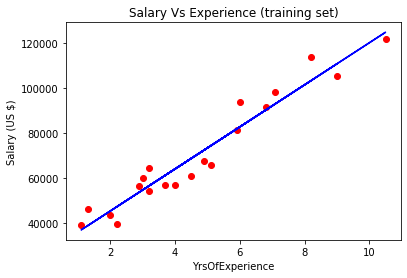

In [29]:
# Visualizing, obvisouly we will make a scatter plot.
# Plot training set, we need to see the regression/trendLine also
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')  # regressor.predict(X_train) will give us the trend line if you really think about it. 
plt.title('Salary Vs Experience (training set)')
plt.xlabel('YrsOfExperience')
plt.ylabel('Salary (US $)')
# the red points are the real salaries, the predicted values are on the blue line

Text(0, 0.5, 'Salary (US $)')

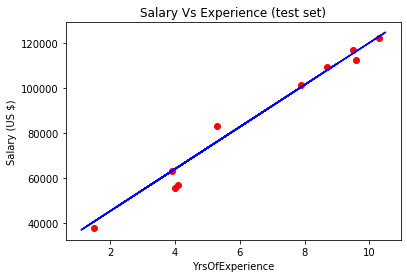

In [30]:
# Now lets draw a scatter plot for the test set, we'll still keep the trendline
# that will give us a good visualization of how close the test set data points are closer to the trendline
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')  # regressor.predict(X_train) will give us the trend line if you really think about it. 
plt.title('Salary Vs Experience (test set)')
plt.xlabel('YrsOfExperience')
plt.ylabel('Salary (US $)')
# we see that the test set trend line is also very close to the test data points, so the trend line is very good.
# This means that the trend line is very good for making predictions. If we now draw a plot of X_test vs y_pred,
# all points will be actually on the trend line

Text(0, 0.5, 'Salary (US $)')

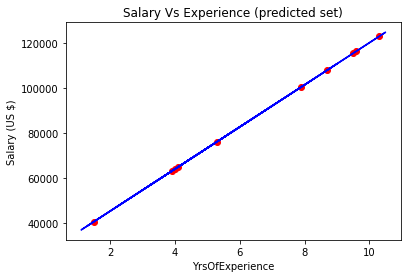

In [31]:
plt.scatter(X_test, y_pred, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')  # regressor.predict(X_train) will give us the trend line if you really think about it. 
plt.title('Salary Vs Experience (predicted set)')
plt.xlabel('YrsOfExperience')
plt.ylabel('Salary (US $)')

In [32]:
# print what the regressor learnt from the training set (ie the coefficient and the slope/intercept)
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031183


In [33]:
# predict the salary given no. of years of experience
regressor.predict([[12]]) # salary for 12 yrs experience

array([138967.5015615])